In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
def define_cam_dist(N):
  X = np.random.uniform(0,1, N)
  Y = np.random.uniform(0,1, N)

  dist = np.zeros((N, N))
  cam = np.arange(N)

  for i in range(N):
      for j in range(N):
          dist[i][j] = math.sqrt(math.pow((X[i] - X[j]),2) + math.pow((Y[i] - Y[j]), 2))

  return cam, dist, X, Y

In [ ]:
def encontra_energia(N, cam, dist):
  ener = 0
  for i in range(N-1):
      ener += dist[cam[i]][cam[i+1]]
  ener += dist[cam[0]][cam[N-1]]
  return ener

In [ ]:
def gera_novo_cam(N, cam):
  ncam = np.zeros(N, dtype=np.int16)

  i = np.random.randint(N)
  j = i
  while j==i:
      i = np.random.randint(N)
  if i > j:
      ini = j
      fim = i
  else:
      ini = i
      fim = j

  for k in range(N):
      if k >= ini and k <= fim:
          ncam[k] = cam[fim - k + ini]
      else:
          ncam[k] = cam[k]

  return ini, fim, ncam

In [ ]:
def diferenca_cam(N, cam, dist):
  ini, fim, ncam = gera_novo_cam(N, cam)
  esq = ini - 1
  if esq < 0: esq = N - 1
  dir = fim + 1
  if dir > N - 1: dir = 0
  de = - dist[cam[esq]][cam[ini]] - dist[cam[dir]][cam[fim]] + dist[ncam[esq]][ncam[ini]] + dist[ncam[dir]][ncam[fim]]
  return ncam, de

In [ ]:
def accept(distancia, temperatura):
  if distancia < 0:
      return True
  elif random.random() <= math.exp(-(distancia/temperatura)):
      return True
  return False

In [ ]:
def plota_caminhos(N, cam, ncam, dist, Xi, Yi, Xf, Yf):
  _, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
  energia = encontra_energia(N,cam,dist)
  ax1.set_title(energia)
  ax1.plot(Xi,Yi,'-o')
  energia = encontra_energia(N,ncam,dist)
  ax2.set_title(energia)
  ax2.plot(Xf,Yf,'-o')

## Monte Carlo

In [ ]:
def monte_carlo(T_inicial=10, T_final=0.0001, dt=0.85, N_passos=100, N=10, M=1):
  plt.figure(figsize=(15,7.5))
  plt.xlabel("Iteracoes")
  plt.ylabel("Distancia")

  for k in range(M):
    Ti = T_inicial
    Tf = T_final
    cam, dist, Xi, Yi = define_cam_dist(N)
    Xi = [Xi[i] for i in cam]
    Yi = [Yi[i] for i in cam]
    energias = []
    temperaturas = []
    ncam = np.array(N)
    cam_orig = cam

    while Ti > Tf:
        for i in range(100):
            ncam, de = diferenca_cam(N, cam, dist)
            if accept(de, Ti):
                cam = ncam
                energia = encontra_energia(N, cam, dist)
        energias.append(energia)
        Ti *= dt
        temperaturas.append(Ti)

    Xf = [Xi[i] for i in cam]
    Yf = [Yi[i] for i in cam]

    plt.plot(energias)

  plota_caminhos(N,cam_orig,cam,dist,Xi,Yi,Xf,Yf)

#### N = 10 cidades

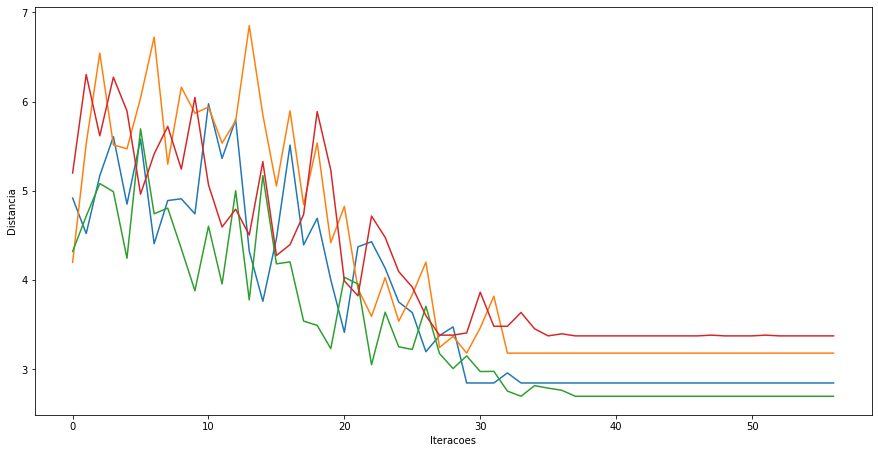

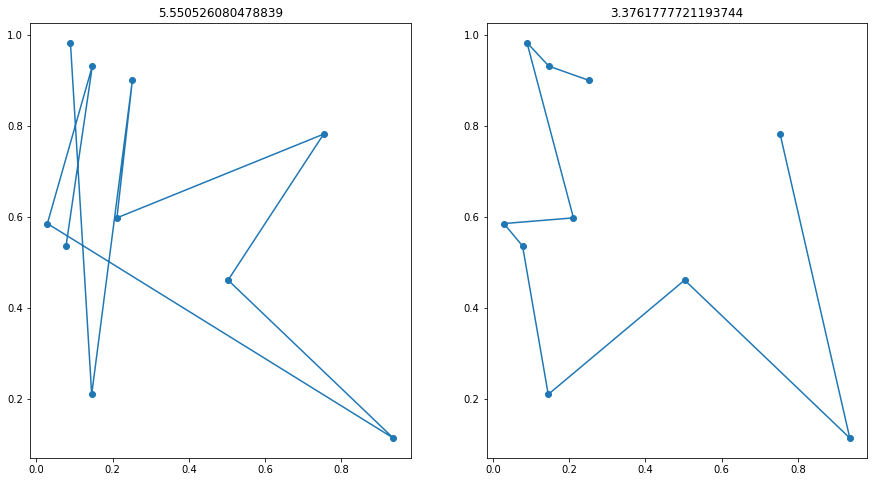

In [ ]:
monte_carlo(T_final=0.001, N=10, M=4)

#### N = 25 cidades

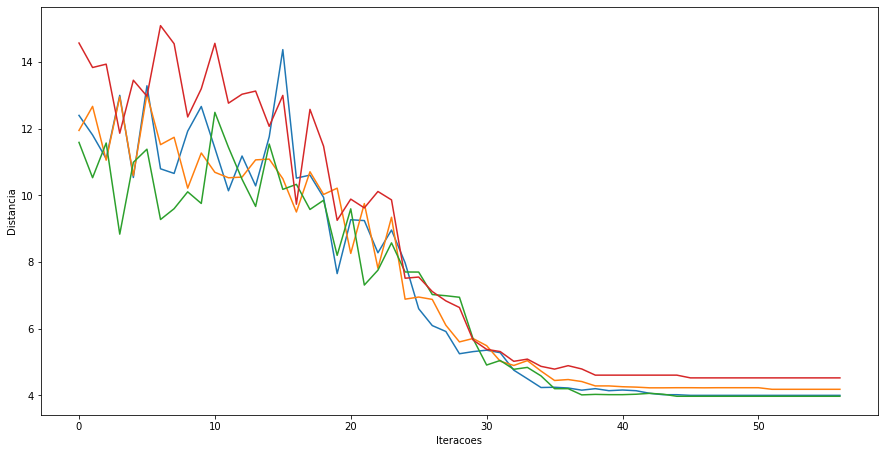

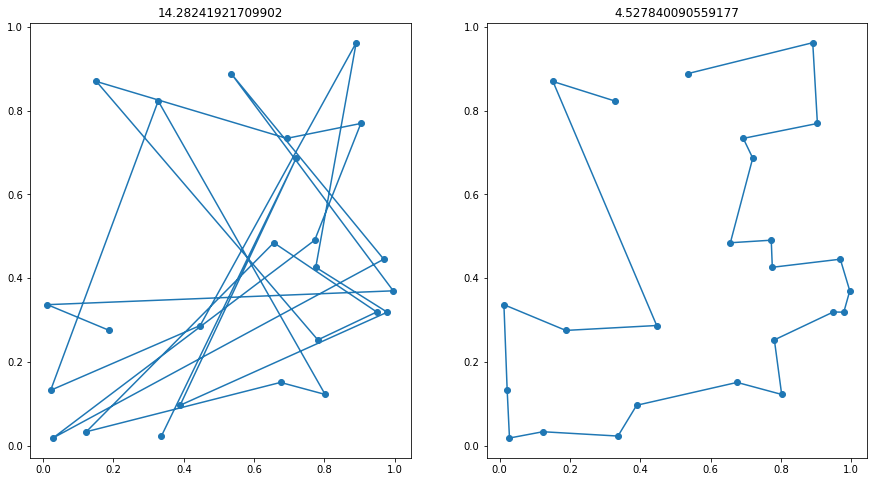

In [ ]:
monte_carlo(T_final=0.001, N=25, M=4)

#### N = 45 cidades

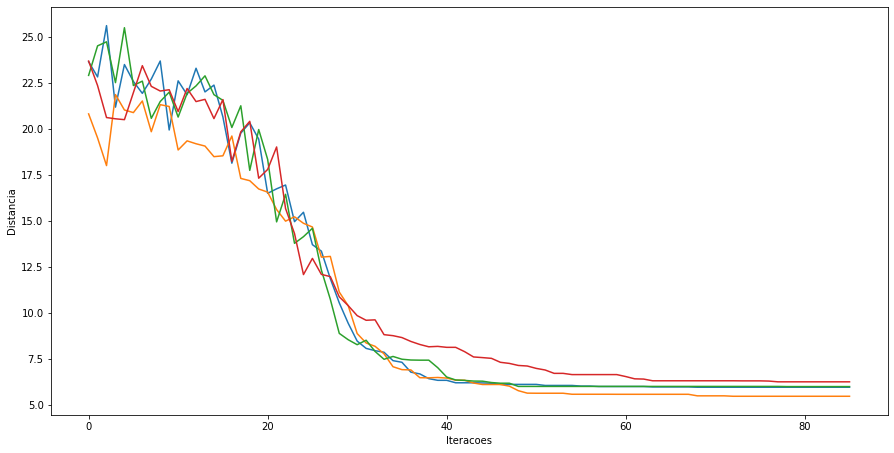

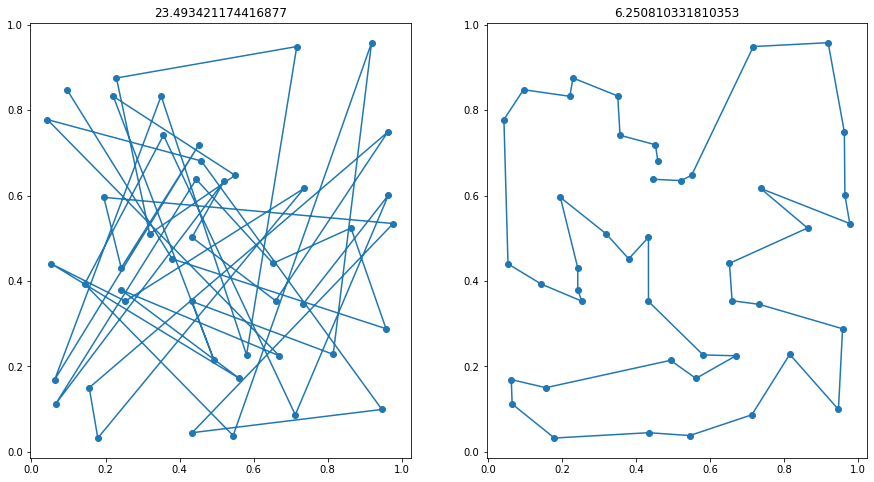

In [ ]:
monte_carlo(T_final=1e-5, N=45, M=4)

#### N = 60 cidades

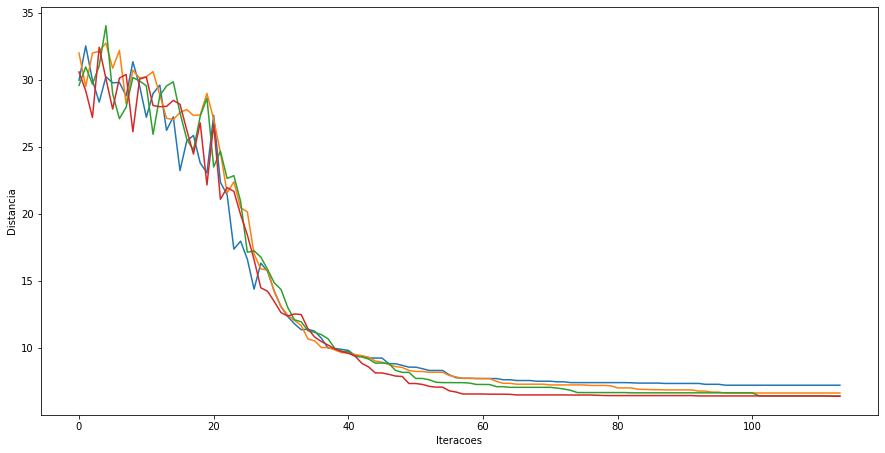

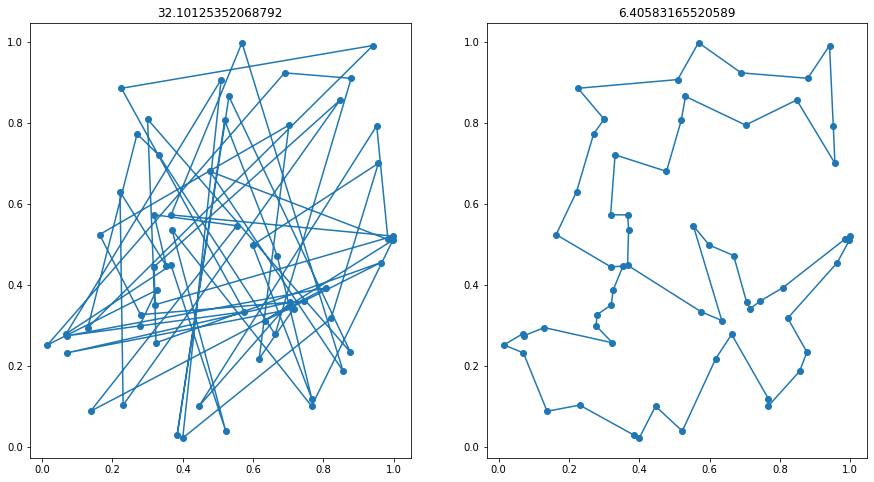

In [ ]:
monte_carlo(T_final=1e-7, N=60, M=4)

#### N = 100 cidades

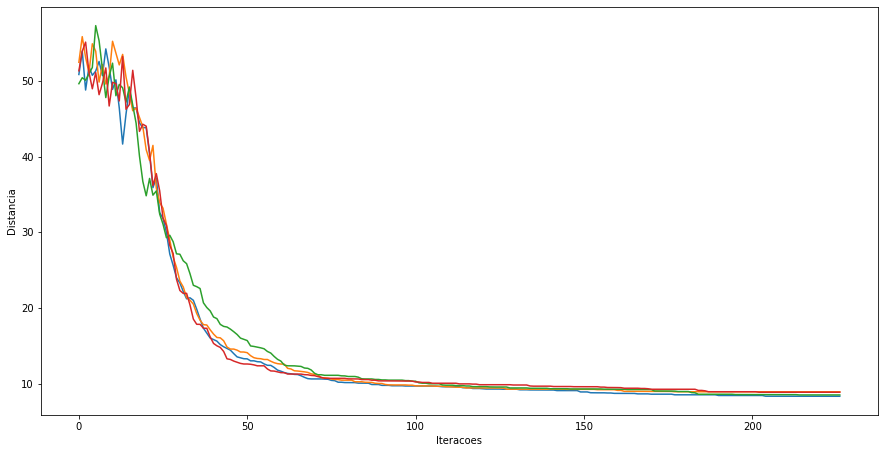

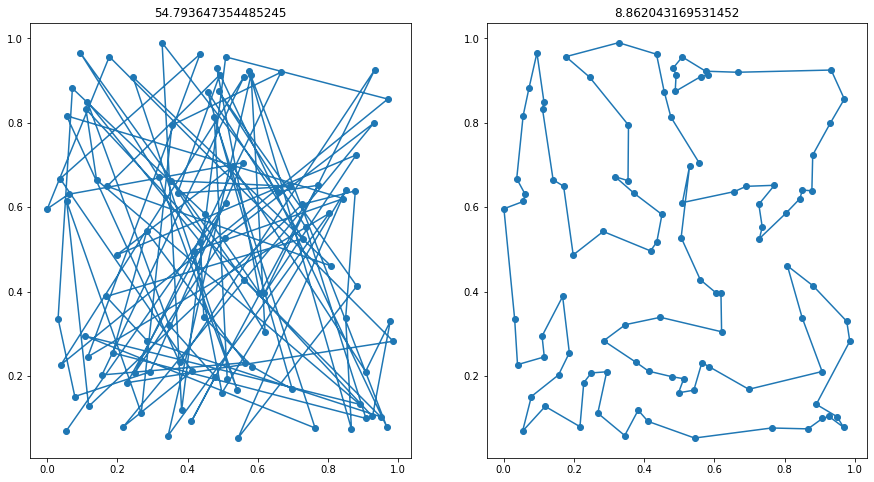

In [ ]:
monte_carlo(T_final=1.0e-15, N=100, M=4)

N = 1000 cidades

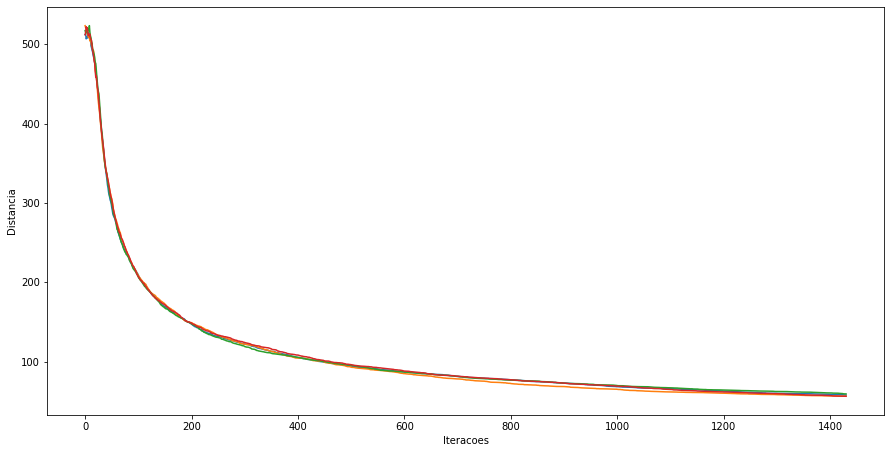

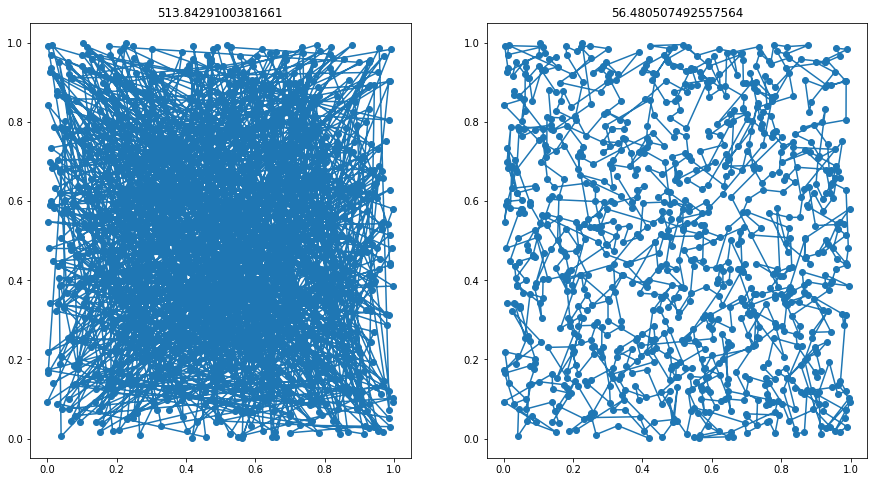

In [ ]:
monte_carlo(T_final=1.0e-100, N=1000, M=4)

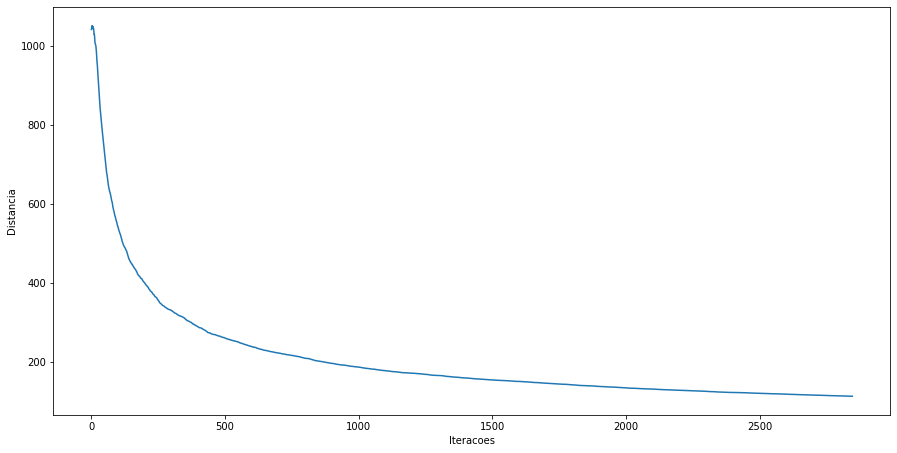

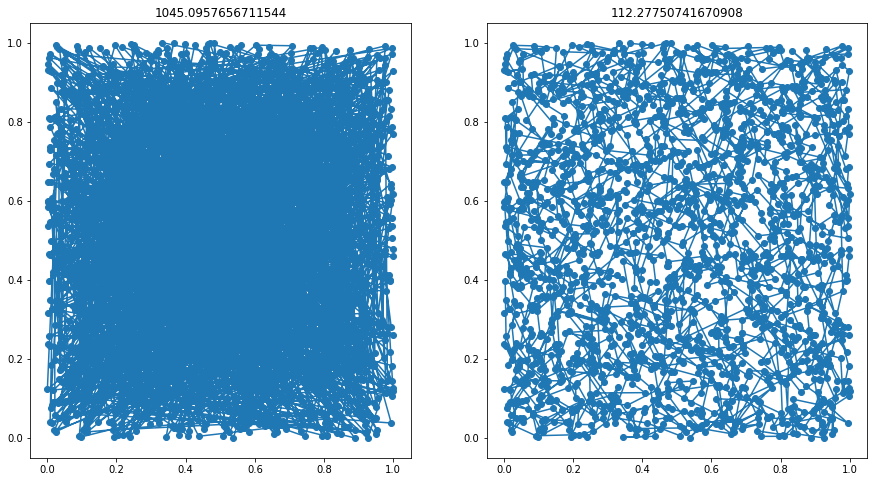

In [ ]:
monte_carlo(T_final=1e-200, N=2000)

# Conclusões

Percebe-se que todas as curvas têm o mesmo comportamento: elas começam oscilando bastante, porém, com a queda da curva, a amplitude das oscilações começa a diminuir, e quanto mais a curva cai, mais ineficiente o algoritmo se torna.

Para N < 60, é possível ver que a curva se estabilizou rapidamente após a queda inicial. Para N > 60, quanto maior o N, mais a curva se aproxima de um decaimento exponencial, parecendo que, quanto maior o número de cidades, mais eficiente o algoritmo é para obter soluções aproximadas, porém mais ineficente é para encontrar um ótimo.
